In [52]:
# -*- coding: utf-8 -*-
"""
Created on Fri May  6 15:14:16 2022

@author: zhuch
"""

# -*- coding: utf-8 -*-
"""
Created on Thu May  5 17:30:53 2022

@author: zhuch
"""

import pickle

import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import torch.nn.functional as F
import h5py
#%%

# with open("speckle.dat", 'rb') as f:
#     input_list = pickle.load(f)

# with open("SLM.dat", 'rb') as f:
#     output_list =pickle.load(f)
    
#%%

# with open("data/experiment results/Speckle_20x_200um_Round_Scale-2.5x_Natural_M_2_10238_112x112.dat", 'rb') as f:
#     input_list = pickle.load(f)

# with open("data/experiment results/Natural_10238.dat", 'rb') as f:
#     output_list =pickle.load(f)
    
#%%

# with open("data/experiment results/Speckle_20x_400um_Round_Scale-2x_Natural_Order_M_1_112x112_10238.dat", 'rb') as f:
#     input_list = pickle.load(f)

# with open("data/experiment results/Natural_Order_10238.dat", 'rb') as f:
#     output_list =pickle.load(f)

    
with open("data/Natural_temp_cifar/Speckle_20x_400um_Round_Scale-2x_Natural_M_003and005_T25_112x112_5000.dat", 'rb') as f:
    input_list = pickle.load(f)

with open("data/Natural_temp_cifar/Natural_Order_5000.dat", 'rb') as f:
    output_list =pickle.load(f)


#%%
# pathname = "data/natcom/Data_1m.h5"
    
    
# hf = h5py.File(pathname, 'r')
# name1 = 'Training/Original_images/ImageNet'
# name2 = 'Training/Speckle_images/ImageNet'

# output_list = hf[name1]
# input_list = hf[name2]

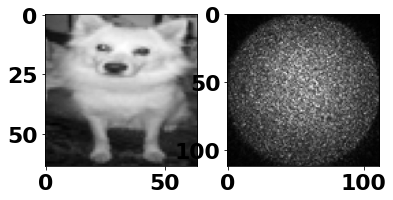

In [53]:
#%%
import matplotlib.pyplot as plt

idx = np.random.randint(0,5000)
# idx = 2600

plt.figure()
plt.subplot(121)
plt.imshow(output_list[idx], cmap = 'gray')
plt.subplot(122)
plt.imshow(input_list[idx].reshape(112,112), cmap = 'gray')
plt.show()

In [9]:
np.shape(input_list)

(5000, 112, 112, 1)

In [54]:

#%%
# s = input_list[5]
# x = np.arange(0,112,1)
# y = np.arange(0,112,1)
# X,Y = np.meshgrid(x,y)
# plt.figure()
# ax = plt.axes(projection='3d')
# ax.scatter(X,Y,s.reshape(112,112), cmap='viridis')
# # plt.colorbar()
# plt.show()

#%%
N_sample = 500
start_id = 0
train_rate = 0.9
train_set_number = int(train_rate*N_sample)

input_dim = (112,112)
output_dim = 64

input_H = np.array(input_list).reshape(-1,1, *input_dim)
label = np.array(output_list).reshape(-1,1,output_dim, output_dim)

train_number = np.arange(start_id,start_id + N_sample, dtype ='int')
np.random.shuffle(train_number)

x_train = input_H[train_number[0:train_set_number]]
x_test = input_H[train_number[train_set_number:N_sample]]

y_train =label[train_number[0:train_set_number]]
y_test = label[train_number[train_set_number:N_sample]]

x_train = torch.FloatTensor(x_train/256.0)
x_test = torch.FloatTensor(x_test/256.0)

y_train = torch.FloatTensor(y_train/256.0)
y_test = torch.FloatTensor(y_test/256.0)
    
    

#%%
del input_list
del output_list
del input_H
del label
#%%
torch.cuda.empty_cache()


In [55]:
batch_size = 100

# create data loaders
train_dataloader = DataLoader(list(zip(x_train, y_train)), batch_size = batch_size )
test_dataloader = DataLoader(list(zip(x_test,y_test)),  batch_size = batch_size )


In [1352]:
#%%
# device = 'cuda'
# Nnodes = 2048
# # Nnodes = 6048

# class NeuralNetwork(nn.Module):
#     def __init__(self):
#         super(NeuralNetwork, self).__init__()
#         self.fc1 = nn.Linear(112*112, Nnodes)
#         self.fc2 = nn.Linear(Nnodes, 64*64)
#         self.dp = nn.Dropout(0.3)
#         self.BN = nn.BatchNorm1d(Nnodes)
#         self.BN2 = nn.BatchNorm1d(64*64)  
#         self.flatten = nn.Flatten()
        
#     def forward(self, x):
#         x = self.flatten(x)
#         x = self.BN(self.dp(F.relu(self.fc1(x))))
#         x = self.BN2(self.dp(F.sigmoid(self.fc2(x))))
#         # x = self.dp(F.relu(self.fc2(x)))
#         x = x.view(-1,1,64,64)
#         return x

# model = NeuralNetwork().to(device)
# from torchsummary import summary
# summary(model, (1, 112, 112))

#%%
# # Define model
# Nnodes = 4096

# class NeuralNetwork(nn.Module):
#     def __init__(self):
#         super(NeuralNetwork, self).__init__()
#         self.fc1 = nn.Linear(64*64, Nnodes)
#         self.fc2 = nn.Linear(Nnodes, 112*112)
#         self.dp = nn.Dropout(0.5)
#         self.BN = nn.BatchNorm1d(Nnodes)
#         self.BN2 = nn.BatchNorm1d(112*112)  
# #         self.BN3 = nn.BatchNorm2d(10)  
# #         self.ct1 = nn.ConvTranspose2d(1,10,2,stride = 2)
# #         self.ct2 = nn.ConvTranspose2d(10,6,2,stride = 2)
        
# #         self.conv2 = nn.Conv2d(6,1,3)
# #         self.pool = nn.MaxPool2d(2,2)
#         self.flatten = nn.Flatten()
# #         self.fc3 = nn.Linear(3969, 64*64)
        
#     def forward(self, x):
#         x = self.flatten(x)
#         x = self.BN(self.dp(F.leaky_relu(self.fc1(x))))
#         x = self.BN2(self.dp(F.relu(self.fc2(x))))
#         x = x.view(-1,1,112,112)
#         # x = F.relu(self.ct1(x))
#         # x = F.relu(self.ct2(x))
#         # x = self.pool(self.conv2(x))
#         # x = self.flatten(x)
#         # x = self.dp(F.leaky_relu(self.fc3(x)))
#         # x = x.view(-1,1,64,64)
#         return x

# model = NeuralNetwork().to(device)
# from torchsummary import summary
# summary(model, (1, 64, 64))

#%%

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                [-1, 12544]               0
            Linear-2                 [-1, 2048]      25,692,160
           Dropout-3                 [-1, 2048]               0
       BatchNorm1d-4                 [-1, 2048]           4,096
            Linear-5                 [-1, 4096]       8,392,704
           Dropout-6                 [-1, 4096]               0
       BatchNorm1d-7                 [-1, 4096]           8,192
Total params: 34,097,152
Trainable params: 34,097,152
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/backward pass size (MB): 0.24
Params size (MB): 130.07
Estimated Total Size (MB): 130.35
----------------------------------------------------------------


In [25]:
# # Define model
# Nnodes = 2048
# device = 'cuda'
# class NeuralNetwork(nn.Module):
#     def __init__(self):
#         super(NeuralNetwork, self).__init__()
#         self.fc1 = nn.Linear(110*110, Nnodes)
#         self.fc2 = nn.Linear(Nnodes, 64*64)
#         self.dp = nn.Dropout(0.2)
#         self.BN = nn.BatchNorm1d(Nnodes)
#         self.BN2 = nn.BatchNorm1d(64*64)  
        
#         self.cv = nn.Conv2d(1, 200, 3)
#         self.cv2 = nn.Conv2d(200,1,1)
#         self.conv2 = nn.Conv2d(6,1,3)
#         self.pool = nn.MaxPool2d(2,2)
#         self.flatten = nn.Flatten()
        
#     def forward(self, x):
#         x1 = self.cv(x)
#         x2 = self.cv2(x1)
#         x3 = self.flatten(x2)
#         x4 = self.BN(self.dp(F.leaky_relu(self.fc1(x3))))
#         x5 = self.BN2(self.dp(F.sigmoid(self.fc2(x4))))
#         x5 = x5.view(-1,1,64,64)
#         return x5

# model = NeuralNetwork().to(device)
# from torchsummary import summary
# summary(model, (1, 112, 112))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 200, 110, 110]           2,000
            Conv2d-2          [-1, 1, 110, 110]             201
           Flatten-3                [-1, 12100]               0
            Linear-4                 [-1, 2048]      24,782,848
           Dropout-5                 [-1, 2048]               0
       BatchNorm1d-6                 [-1, 2048]           4,096
            Linear-7                 [-1, 4096]       8,392,704
           Dropout-8                 [-1, 4096]               0
       BatchNorm1d-9                 [-1, 4096]           8,192
Total params: 33,190,041
Trainable params: 33,190,041
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/backward pass size (MB): 18.79
Params size (MB): 126.61
Estimated Total Size (MB): 145.45
--------------------------------

In [56]:
###Define model
Nnodes = 2048
device = 'cuda'
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(112*112, output_dim*output_dim)
        self.flatten = nn.Flatten()
        
    def forward(self, x):
        x3 = self.flatten(x)
        x4 = self.fc1(x3)
        x5 = x4.view(-1,1,output_dim,output_dim)
        return x5

model = NeuralNetwork().to(device)
from torchsummary import summary
summary(model, (1, 112, 112))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                [-1, 12544]               0
            Linear-2                 [-1, 4096]      51,384,320
Total params: 51,384,320
Trainable params: 51,384,320
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.05
Forward/backward pass size (MB): 0.13
Params size (MB): 196.02
Estimated Total Size (MB): 196.19
----------------------------------------------------------------


In [28]:
# !pip install torchsummary

  Using cached torchsummary-1.5.1-py3-none-any.whl (2.8 kB)


In [1385]:
# import torchvision
# device = "cuda"
# # input_dim = (112,112)
# # output_dim = (64,64)

# def conv(in_channels, out_channels, pad = 1):
#     return nn.Sequential(
#         nn.Conv2d(in_channels, out_channels, 4, padding = pad, stride = 2),
#         nn.BatchNorm2d(out_channels),
#         nn.LeakyReLU(inplace=True)
#     )   

# def convup(in_channels, out_channels, pad = 1):
#     return nn.Sequential(
#         nn.ConvTranspose2d(in_channels, out_channels, 4, padding = pad, stride = 2),
#         nn.Dropout(0.2),
#         nn.BatchNorm2d(out_channels),
#         nn.ReLU(inplace=True)
#     )   

# class UNet(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.down1 = conv(1,64)
#         self.down2 = conv(64,128, pad = 5)
#         self.down3 = conv(128,256)
#         self.down4 = conv(256,512)
#         self.down5 = conv(512, 1024)
#         self.down6 = conv(1024, 2048)
        
#         self.up1 = convup(2048,256)
#         self.up2 = convup(256+1024,128)
#         self.up3 = convup(128+512,64)
#         self.up4 = convup(64+256,64)
#         self.up5 = nn.ConvTranspose2d(64, 1, 4, padding = 1, stride = 2)
#         self.BN = nn.BatchNorm2d(1)
        
        
#     def forward(self, x):
#         x1 = self.down1(x)
#         x2 = self.down2(x1)
#         x3 = self.down3(x2)
#         x4 = self.down4(x3)
#         x5 = self.down5(x4)
#         x6 = self.down6(x5)
        
#         x = self.up1(x6)
#         x = torch.cat([x, x5], dim = 1)
#         x = self.up2(x)
#         x = torch.cat([x, x4], dim = 1)
#         x = self.up3(x)
#         x = torch.cat([x, x3], dim = 1)
#         x = self.up4(x)
#         x = F.tanh(self.BN(self.up5(x)))
        
#         return x
        
# model = UNet().to(device)
# from torchsummary import summary
# summary(model, (1, 112, 112))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 56, 56]           1,088
       BatchNorm2d-2           [-1, 64, 56, 56]             128
         LeakyReLU-3           [-1, 64, 56, 56]               0
            Conv2d-4          [-1, 128, 32, 32]         131,200
       BatchNorm2d-5          [-1, 128, 32, 32]             256
         LeakyReLU-6          [-1, 128, 32, 32]               0
            Conv2d-7          [-1, 256, 16, 16]         524,544
       BatchNorm2d-8          [-1, 256, 16, 16]             512
         LeakyReLU-9          [-1, 256, 16, 16]               0
           Conv2d-10            [-1, 512, 8, 8]       2,097,664
      BatchNorm2d-11            [-1, 512, 8, 8]           1,024
        LeakyReLU-12            [-1, 512, 8, 8]               0
           Conv2d-13           [-1, 1024, 4, 4]       8,389,632
      BatchNorm2d-14           [-1, 102

/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [615]:
# # !pip install torchsummary
# from torch.optim.optimizer import Optimizer
# import math

# class Nadam(Optimizer):
#     """Implements Nadam algorithm (a variant of Adam based on Nesterov momentum).
#     It has been proposed in `Incorporating Nesterov Momentum into Adam`__.
#     Arguments:
#         params (iterable): iterable of parameters to optimize or dicts defining
#             parameter groups
#         lr (float, optional): learning rate (default: 2e-3)
#         betas (Tuple[float, float], optional): coefficients used for computing
#             running averages of gradient and its square
#         eps (float, optional): term added to the denominator to improve
#             numerical stability (default: 1e-8)
#         weight_decay (float, optional): weight decay (L2 penalty) (default: 0)
#         schedule_decay (float, optional): momentum schedule decay (default: 4e-3)
#     __ http://cs229.stanford.edu/proj2015/054_report.pdf
#     __ http://www.cs.toronto.edu/~fritz/absps/momentum.pdf
#         Originally taken from: https://github.com/pytorch/pytorch/pull/1408
#         NOTE: Has potential issues but does work well on some problems.
#     """

#     def __init__(self, params, lr=2e-3, betas=(0.9, 0.999), eps=1e-8,
#                  weight_decay=0, schedule_decay=4e-3):
#         if not 0.0 <= lr:
#             raise ValueError("Invalid learning rate: {}".format(lr))
#         defaults = dict(
#             lr=lr, betas=betas, eps=eps, weight_decay=weight_decay, schedule_decay=schedule_decay)
#         super(Nadam, self).__init__(params, defaults)

#     @torch.no_grad()
#     def step(self, closure=None):
#         """Performs a single optimization step.
#         Arguments:
#             closure (callable, optional): A closure that reevaluates the model
#                 and returns the loss.
#         """
#         loss = None
#         if closure is not None:
#             with torch.enable_grad():
#                 loss = closure()

#         for group in self.param_groups:
#             for p in group['params']:
#                 if p.grad is None:
#                     continue
#                 grad = p.grad
#                 state = self.state[p]

#                 # State initialization
#                 if len(state) == 0:
#                     state['step'] = 0
#                     state['m_schedule'] = 1.
#                     state['exp_avg'] = torch.zeros_like(p)
#                     state['exp_avg_sq'] = torch.zeros_like(p)

#                 # Warming momentum schedule
#                 m_schedule = state['m_schedule']
#                 schedule_decay = group['schedule_decay']
#                 exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
#                 beta1, beta2 = group['betas']
#                 eps = group['eps']
#                 state['step'] += 1
#                 t = state['step']
#                 bias_correction2 = 1 - beta2 ** t

#                 if group['weight_decay'] != 0:
#                     grad = grad.add(p, alpha=group['weight_decay'])

#                 momentum_cache_t = beta1 * (1. - 0.5 * (0.96 ** (t * schedule_decay)))
#                 momentum_cache_t_1 = beta1 * (1. - 0.5 * (0.96 ** ((t + 1) * schedule_decay)))
#                 m_schedule_new = m_schedule * momentum_cache_t
#                 m_schedule_next = m_schedule * momentum_cache_t * momentum_cache_t_1
#                 state['m_schedule'] = m_schedule_new

#                 # Decay the first and second moment running average coefficient
#                 exp_avg.mul_(beta1).add_(grad, alpha=1. - beta1)
#                 exp_avg_sq.mul_(beta2).addcmul_(grad, grad, value=1. - beta2)

#                 denom = (exp_avg_sq.sqrt() / math.sqrt(bias_correction2)).add_(eps)
#                 p.addcdiv_(grad, denom, value=-group['lr'] * (1. - momentum_cache_t) / (1. - m_schedule_new))
#                 p.addcdiv_(exp_avg, denom, value=-group['lr'] * momentum_cache_t_1 / (1. - m_schedule_next))

#         return loss

In [57]:

#%%
import ssim
# loss_fn = ssim.SSIM()

from torch.optim.lr_scheduler import ReduceLROnPlateau
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),  lr=1e-4)
# optimizer = Nadam(model.parameters(), lr=1e-3)
scheduler = ReduceLROnPlateau(optimizer)


def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"Train loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    return loss
#     return loss.cpu().detach().numpy()       
            
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
    test_loss /= num_batches
    print(f"Test Loss:  {test_loss:>8f} \n")
    return test_loss
    
    

In [58]:
#%%  Neural network training


epochs = 200

Loss_train = []
Loss_test = []
steps = []



best_loss = 1.0

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss = train(train_dataloader, model, loss_fn, optimizer)
    test_loss = test(test_dataloader, model, loss_fn)
    Loss_train.append(train_loss)
    Loss_test.append(test_loss)
    if test_loss<best_loss:
        best_loss = test_loss
    steps.append(t)
    scheduler.step(test_loss)
print("Done!")    
    

Epoch 1
-------------------------------
Train loss: 0.283523  [    0/  450]
Test Loss:  0.110627 

Epoch 2
-------------------------------
Train loss: 0.098125  [    0/  450]
Test Loss:  0.055609 

Epoch 3
-------------------------------
Train loss: 0.055436  [    0/  450]
Test Loss:  0.055507 

Epoch 4
-------------------------------
Train loss: 0.059419  [    0/  450]
Test Loss:  0.049642 

Epoch 5
-------------------------------
Train loss: 0.047532  [    0/  450]
Test Loss:  0.048210 

Epoch 6
-------------------------------
Train loss: 0.046091  [    0/  450]
Test Loss:  0.043865 

Epoch 7
-------------------------------
Train loss: 0.044169  [    0/  450]
Test Loss:  0.042827 

Epoch 8
-------------------------------
Train loss: 0.042536  [    0/  450]
Test Loss:  0.042348 

Epoch 9
-------------------------------
Train loss: 0.041355  [    0/  450]
Test Loss:  0.041252 

Epoch 10
-------------------------------
Train loss: 0.040690  [    0/  450]
Test Loss:  0.040522 

Epoch 11


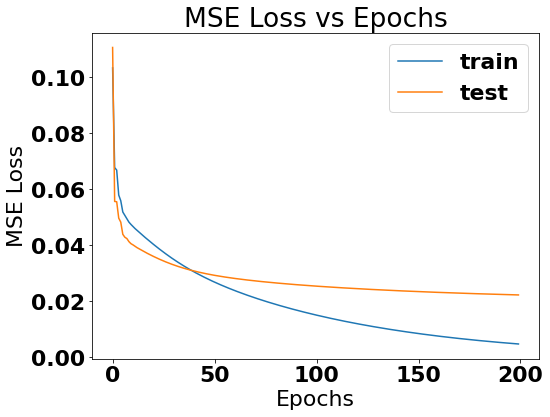

In [59]:

# %%
plt.figure(figsize = (8,6))
plt.title("MSE Loss vs Epochs")
plt.plot(steps, torch.FloatTensor(Loss_train).cpu(), label = 'train')
plt.plot(steps, Loss_test, label = 'test')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()
        
#%%
torch.cuda.empty_cache()
#%%


#%%
# figure configuration
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)


In [60]:
torch.save(model.state_dict(), 'model/exp_mlmodel7.dat')

#%%  test model

test_model = NeuralNetwork().to('cpu')
# test_model =UNet().to('cpu')

test_model.load_state_dict(torch.load('model/exp_mlmodel7.dat'))


<All keys matched successfully>

In [31]:
md = test_model.state_dict()
print(md)

OrderedDict([('fc1.weight', tensor([[-0.0124, -0.0109,  0.0054,  ...,  0.0036, -0.0049, -0.0099],
        [ 0.0007, -0.0114,  0.0118,  ...,  0.0077,  0.0043, -0.0005],
        [-0.0028,  0.0034,  0.0037,  ..., -0.0031,  0.0027, -0.0069],
        ...,
        [-0.0113, -0.0139,  0.0041,  ...,  0.0032,  0.0058, -0.0026],
        [-0.0131, -0.0003,  0.0129,  ...,  0.0034,  0.0130,  0.0037],
        [-0.0028, -0.0088, -0.0010,  ...,  0.0042, -0.0021, -0.0112]])), ('fc1.bias', tensor([-0.0023,  0.0084, -0.0062,  ...,  0.0085, -0.0052,  0.0054]))])


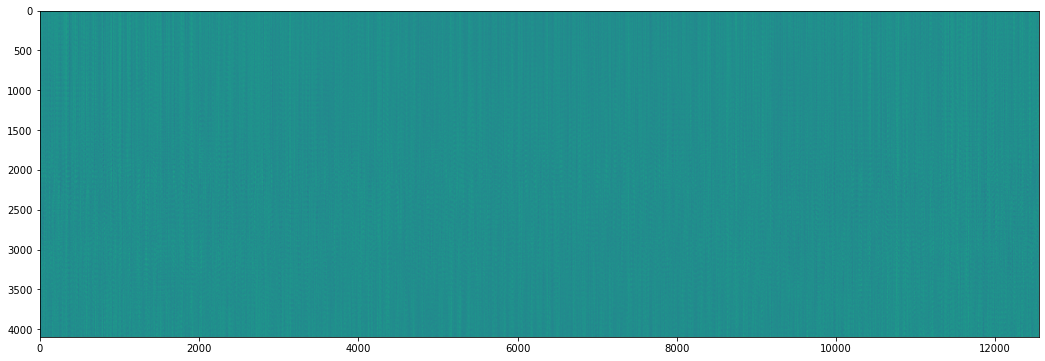

In [36]:
plt.figure(figsize =(20,6))
plt.imshow(md['fc1.weight'])
plt.show()

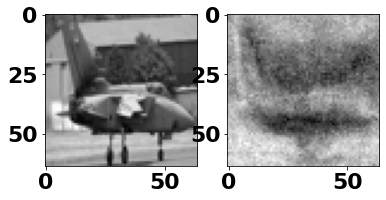

In [96]:
test_number = np.random.randint(0,50)

with torch.no_grad():
    test_model.eval()
    X= x_test[test_number].reshape(-1,1,112,112)
    pred = test_model(X)
plt.figure() 
plt.subplot(121)
plt.imshow(y_test[test_number].reshape(output_dim,output_dim), cmap = 'gray')  
plt.subplot(122)
plt.imshow(pred[0].reshape(output_dim,output_dim), cmap = 'gray')
# plt.imshow(pred[0].reshape(64,64))
plt.show()



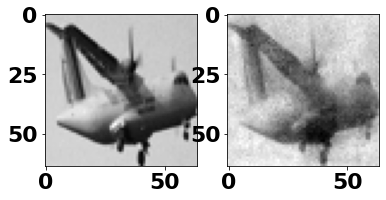

In [77]:
#%%
test_number = np.random.randint(0,400)

with torch.no_grad():
    test_model.eval()
    X= x_train[test_number].reshape(-1,1,*input_dim)
    pred = test_model(X)
plt.figure() 
plt.subplot(121)
plt.imshow(y_train[test_number].reshape(output_dim,output_dim), cmap = 'gray')  
plt.subplot(122)
plt.imshow(pred[0].reshape(output_dim,output_dim), cmap = 'gray')
# plt.imshow(pred[0].reshape(64,64))
plt.show()

#%%
# test_number = np.random.randint(0,500)

# with torch.no_grad():
#     test_model.eval()
#     X = x_train[test_number].reshape(-1,1, *input_dim)
#     pred = test_model(X)
  
# plt.figure() 

# plt.subplot(121)
# plt.imshow(y_train[test_number].reshape(64,64), cmap = 'gray')  
# plt.subplot(122)
# plt.imshow(pred[0].reshape(64,64), cmap = 'gray')
# plt.show()